# Util functions

TODO:
- update widget defaults to be the same as the direct input values below

In [1]:
import numpy as np

def create_results_dict(
        input
    ):
    """ Returns results as a dictionary, to make it easier to compare between runs. """

    nt, dt, time_array, T_parcel_array, P_parcel_array, RH_parcel_array, q_parcel_array, z_parcel_array, \
    qa_ts, qc_ts, qr_ts, na_ts, nc_ts, nr_ts, \
    spectra_arr, con_ts, act_ts, evp_ts, dea_ts, acc_ts, aut_ts, precip_ts, particles_array, \
    rc_liq_avg_array, rc_liq_std_array, TAU_ts_array, albedo_array = input

    results = {
        'nt': nt, 'dt': dt, 'time': time_array, 'T_parcel': T_parcel_array, 'P_parcel': P_parcel_array, 'RH_parcel': RH_parcel_array, 'q_parcel': q_parcel_array, 'z_parcel': z_parcel_array,
        'qa': qa_ts, 'qc': qc_ts, 'qr': qr_ts, 'na': na_ts, 'nc': nc_ts, 'nr': nr_ts,
        'spectra': spectra_arr, 'con': con_ts, 'act': act_ts, 'evp': evp_ts, 'dea': dea_ts, 'acc': acc_ts, 'aut': aut_ts, 'precip': precip_ts, 'particles': particles_array,
        'rc_liq_avg': rc_liq_avg_array, 'rc_liq_std': rc_liq_std_array, 'tau': TAU_ts_array, 'albedo': albedo_array
    }
    
    return results


def rwp(results, w):
    """ Calculate rainwater path from results dict. """
    from PyLCM.parcel import parcel_rho

    rho_parcel_array, _, _ = parcel_rho(results['P_parcel'], results['T_parcel'])

    return np.cumsum(rho_parcel_array * results['qr'] * w * results['dt'])


def extract_widget_inputs(
        n_particles_widget, P_widget, RH_widget, T_widget, w_widget, nt_widget, dt_widget, rm_spec, ascending_mode_widget, mode_displaytype_widget, z_widget, max_z_widget,
        Condensation_widget, Collision_widget, mode_aero_init_widget, gridwidget, kohler_widget, hygroscopicity_widget, switch_sedi_removal_widget,
        entrainment_rate_widget, switch_entrainment_widget, entrainment_start_widget, entrainment_end_widget
        ):
    """ Convert widget input parameters to raw values to input to model """
    
    # Model steering parameters
    dt = dt_widget.value
    nt = nt_widget.value

    do_condensation = Condensation_widget.value
    do_collision    = Collision_widget.value

    n_particles = n_particles_widget.value

    # Parcel initial parameters
    T_parcel   = T_widget.value
    P_parcel   = P_widget.value
    RH_parcel  = RH_widget.value
    w_parcel   = w_widget.value
    z_parcel   = z_widget.value

    max_z = max_z_widget.value

    ascending_mode  = ascending_mode_widget.value

    display_mode    = mode_displaytype_widget.value
    
    # Aerosol initialization
    mode_aero_init = mode_aero_init_widget.value

    # Read in the variables given above taking into account unit factors
    N_aero     = [gridwidget[1, 0].value*1.0E6, gridwidget[1, 1].value*1.0E6, gridwidget[1, 2].value*1.0E6, gridwidget[1, 3].value*1.0E6]
    mu_aero    = [gridwidget[2, 0].value*1.0E-6, gridwidget[2, 1].value*1.0E-6, gridwidget[2, 2].value*1.0E-6, gridwidget[2, 3].value*1.0E-6]
    sigma_aero = [gridwidget[3, 0].value, gridwidget[3, 1].value, gridwidget[3, 2].value, gridwidget[3, 3].value]
    k_aero     = [gridwidget[4, 0].value, gridwidget[4, 1].value, gridwidget[4, 2].value, gridwidget[4, 3].value]

    kohler_activation_radius    = kohler_widget.value
    switch_kappa_koehler        = hygroscopicity_widget.value
    switch_sedi_removal         = switch_sedi_removal_widget.value
    entrainment_rate            = entrainment_rate_widget.value
    switch_entrainment          = switch_entrainment_widget.value
    entrainment_start           = entrainment_start_widget.value
    entrainment_end             = entrainment_end_widget.value

    return \
        dt, nt, do_condensation, do_collision, n_particles, \
        T_parcel, P_parcel, RH_parcel, w_parcel, z_parcel, max_z, \
        rm_spec, ascending_mode, display_mode, \
        mode_aero_init, N_aero, mu_aero, sigma_aero, k_aero, \
        kohler_activation_radius, switch_kappa_koehler, switch_sedi_removal, \
        entrainment_rate, switch_entrainment, entrainment_start, entrainment_end

# Setup model

In [2]:
# Import necessary modules
from PyLCM.animation import *
from PyLCM.widget import *
from PyLCM.timestep_routine import *
from PyLCM.parameters import *
# Import user modifiable modules
from Post_process.analysis import *
from Post_process.print_plot import *

# Uncomment lines below when changing source files
#######################
%load_ext autoreload
%autoreload 2
#######################

# User interface (initialise model with widgets)

You can use the user interface widgets below to initialise the model, if you find it more intuitive than the direct input.

## Model steering parameters

In [3]:
# dt_widget, nt_widget, Condensation_widget, Collision_widget, switch_sedi_removal, n_particles_widget, max_z_widget = model_steering_input()

## Parcel parameters

In [4]:
# T_widget, P_widget, RH_widget, w_widget, z_widget = parcel_info_input()

# ascending_mode_widget = ascending_mode_input()

## Entrainment parameters

In [5]:
# entrainment_widget, stability_widget, entrainment_start_widget, entrainment_end_widget, entrainment_rate_widget  = entrainment_input()

### Create environment profile for entrainment

In [6]:
# qv_init                             = RH_widget.value * esatw( T_widget.value ) / ( P_widget.value - RH_widget.value * esatw( T_widget.value ) ) * r_a / rv
# qv_profiles, theta_profiles, z_env  = create_env_profiles(T_widget.value, qv_init, z_widget.value,P_widget.value, stability_widget.value)

## Aerosol parameters

In [7]:
# #Use activation radius with kohler critical radius
# kohler_widget = kohler_settings()
# #Use hygroscopicity parameter, otherwise, sea-salt aerosols are initialized 
# hygroscopicity_widget = kappa_settings()
# #Choose the mode for aerosol initialization
# mode_aero_init_widget = aero_mode_input()
# # Initialization parameters for aerosol (up to 4 modes)
# gridwidget = grid_modes_input()

# Direct input (without widgets)

You can override the widget values by entering the inputs in the code block below. This can be more convenient as the widgets will override your original input when reloaded.

If you prefer to use the widget UI above, **do not run the code block directly below this one**. Instead, skip to 'Run model'.

In [8]:
from IPython.display import clear_output

dt_widget, nt_widget, Condensation_widget, Collision_widget, switch_sedi_removal, n_particles_widget, max_z_widget = model_steering_input()
T_widget, P_widget, RH_widget, w_widget, z_widget = parcel_info_input()
ascending_mode_widget = ascending_mode_input()
entrainment_widget, stability_widget, entrainment_start_widget, entrainment_end_widget, entrainment_rate_widget  = entrainment_input()
kohler_widget = kohler_settings()
hygroscopicity_widget = kappa_settings()
mode_aero_init_widget = aero_mode_input()
gridwidget = grid_modes_input()
mode_displaytype_widget = timestep_display_mode_settings()


# You can override the widget values by entering the inputs in the code below

# Model steering parameters

dt_widget.value = 1 # s
nt_widget.value = 5000
Condensation_widget.value = True
Collision_widget.value = True
switch_sedi_removal.value = False
n_particles_widget.value = 200
max_z_widget.value = 1500 # m


# Parcel initial parameters

T_widget.value = 289.27 # K
P_widget.value = 101181 # Pa
RH_widget.value = 0.83
w_widget.value = 0.5 # m s-1
z_widget.value = 0 # m
ascending_mode_widget.value = 'linear' # linear / sine / in_cloud_oscillation


# Entrainment parameters

entrainment_widget.value = False
# stability_widget.value = 'Stable' # Stable / Unstable / Neutral
# entrainment_start_widget.value = 1000 # s
# entrainment_end_widget.value = 1030 # s
# entrainment_rate_widget.value = 0.05 # ?

qv_init = RH_widget.value * esatw( T_widget.value ) / ( P_widget.value - RH_widget.value * esatw( T_widget.value ) ) * r_a / rv
qv_profiles, theta_profiles, z_env = create_env_profiles(T_widget.value, qv_init, z_widget.value, P_widget.value, stability_widget.value)


# Koehler theory

kohler_widget.value = False
hygroscopicity_widget.value = False
mode_aero_init_widget.value = 'Random' # Random / Weighting_factor


# Initialisation parameters for aerosol (up to 4 modes)
# N_aero = number of aerosol per cm3 of air | mu = mean droplet radius | sigma = std. of mu | kappa = hygroscopicity parameter

# Mode #1
gridwidget[1,0].value = 200 # N_aero (cm-3)
gridwidget[2,0].value = 0.04 # mu (um)
gridwidget[3,0].value = 1.4 # sigma (-)
gridwidget[4,0].value = 1.0 # kappa

# Mode #2
gridwidget[1,1].value = 0 # N_aero (cm-3)
gridwidget[2,1].value = 0 # mu (um)
gridwidget[3,1].value = 0 # sigma (-)
gridwidget[4,1].value = 0 # kappa

# Mode #3
gridwidget[1,2].value = 0 # N_aero (cm-3)
gridwidget[2,2].value = 0 # mu (um)
gridwidget[3,2].value = 0 # sigma (-)
gridwidget[4,2].value = 0 # kappa

# Mode #4
gridwidget[1,3].value = 0 # N_aero (cm-3)
gridwidget[2,3].value = 0 # mu (um)
gridwidget[3,3].value = 0 # sigma (-)
gridwidget[4,3].value = 0 # kappa


# Display mode

mode_displaytype_widget.value = 'text_fast' # text_fast / graphics


# Comment this out the display the widgets
clear_output()

# Run model

In [9]:
test_run \
    = create_results_dict(timesteps_function(
        n_particles_widget, P_widget, \
        RH_widget, T_widget, w_widget, nt_widget, \
        dt_widget, rm_spec, ascending_mode_widget, \
        mode_displaytype_widget, z_widget, max_z_widget, \
        Condensation_widget, Collision_widget, \
        mode_aero_init_widget, gridwidget, kohler_widget.value, \
        hygroscopicity_widget.value, switch_sedi_removal.value, \
        entrainment_rate_widget.value,entrainment_widget.value,qv_profiles, theta_profiles, entrainment_start_widget.value, entrainment_end_widget.value
    ))

value: Time (s)  z (m)    T (K)    qv (g/kg) RH (%)   QC (g/kg) QR (g/kg) NA (/mg) NC (/mg) NR (/mg)
after: 3000.0    1500.00  279.94   7.36      100.053   1.423     0.713     15.12     58.75     8.37    


# Exercises

In [10]:
# Tip: use major/minor locator and set_x/ylim in matplotlib to help answer the questions

import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

## Exercise 1: Tutorial

<div>
<img src="figs/parcel_model.png", width="800" />
</div>


The idea behind the cloud-parcel model is illustrated in the figure. Its governing equations are described in the reader. The 3 code boxes below initialize and run the parcel model and plot its output. You can execute the code boxes by first selecting them with the mouse and then pressing Shift+Enter.

### Important notes for these exercises

1 ) A reminder: supersaturation is the condition of air where humidity is above the level of saturation at a given temperature, i.e. where relative humidity exceeds 100%. Therefore, we can relate supersaturation ($S$) to relative humidity ($RH$) as:

$S = RH - 100\%$

2 ) There is some stochasticity in the model, so expect slight variations in the outputs even when you run it multiple times with the same inputs. This can be addressed through ensemble averaging of outputs, however this is not currently implemented in the Python version of the model.

### Exercise 1.1

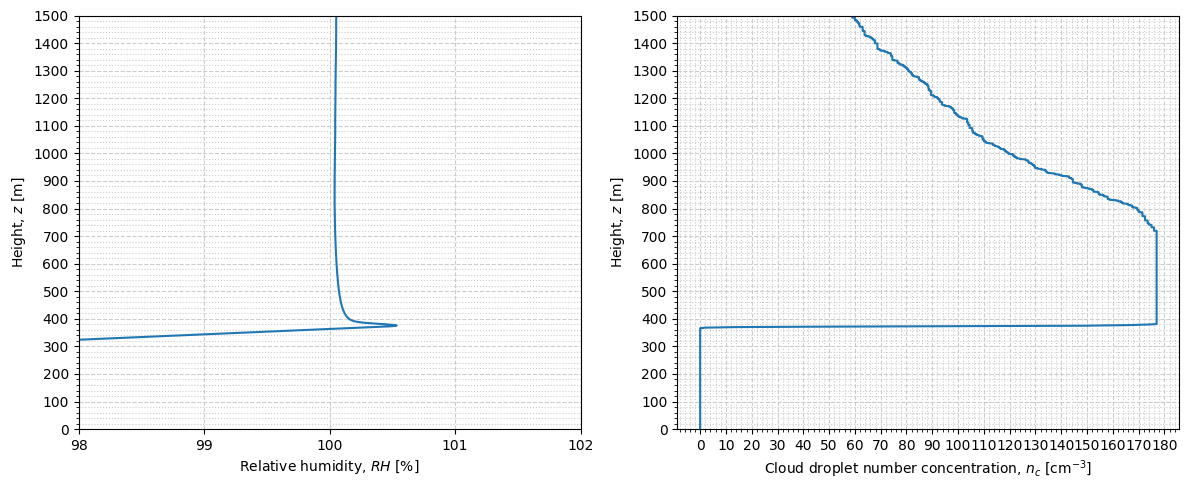

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))


# AX 1

axs[0].plot(test_run['RH_parcel']*100, test_run['z_parcel'])
axs[0].set_xlabel('Relative humidity, $RH$ [%]')

# Major ticks
axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].yaxis.set_major_locator(MultipleLocator(100))

# Minor ticks
axs[0].xaxis.set_minor_locator(AutoMinorLocator(1))
axs[0].yaxis.set_minor_locator(AutoMinorLocator(5))

axs[0].set_xlim(98,102)


# AX 2

axs[1].plot(test_run['nc'], test_run['z_parcel'])
axs[1].set_xlabel('Cloud droplet number concentration, $n_c$ [cm$^{-3}$]')

# Major ticks
axs[1].xaxis.set_major_locator(MultipleLocator(10))
axs[1].yaxis.set_major_locator(MultipleLocator(100))

# Minor ticks
axs[1].xaxis.set_minor_locator(AutoMinorLocator(5))
axs[1].yaxis.set_minor_locator(AutoMinorLocator(5))


for ax in axs:
    ax.set_ylabel('Height, $z$ [m]')
    ax.set_ylim(test_run['z_parcel'][0],test_run['z_parcel'][-1])
    ax.grid(which='major', color='#CCCCCC', linestyle='--')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')

plt.tight_layout()
plt.show()

- At what height does the parcel reach its LCL? **(ANS: approx. 360 m)**
- What is the concentration of cloud droplets at a height of 500 m? **(ANS: 178 mg-1)**
- At what height is the cloud base located? **(ANS: 380 m)**
- When does the ascending parcel move through the base of the cloud? **(ANS: same answer as above, or see time plot)**

### Exercise 1.2

The parcel currently starts at the surface because the corresponding model parameter is set to 'z=0'. Run the model again, this time modifying the parameters such that the parcel starts at 500 m. Also adapt the cloud top height 'z_max' to a value of 1600 m.

- Plot 'relative humidity' and 'cloud droplet number concentration' for the new run.
- Add a plot of the 'mean droplet radius'.

In [23]:
# Reference values

ref_z_init = 0 # m
ref_z_max = 2000 # m

# ref_w = 0.5 # m s-1

ref_N = 300 # cm-3
ref_sigma = 2.0


In [24]:
z_widget.value = ref_z_init
max_z_widget.value = ref_z_max

gridwidget[1,0].value = ref_N # N_aero (cm-3)
# gridwidget[2,0].value = 0.04 # mu (um)
gridwidget[3,0].value = ref_sigma # sigma (-)
# gridwidget[4,0].value = 1.0 # kappa

In [26]:
reference_run \
    = create_results_dict(timesteps_function(
        n_particles_widget, P_widget, \
        RH_widget, T_widget, w_widget, nt_widget, \
        dt_widget, rm_spec, ascending_mode_widget, \
        mode_displaytype_widget, z_widget, max_z_widget, \
        Condensation_widget, Collision_widget, \
        mode_aero_init_widget, gridwidget, kohler_widget.value, \
        hygroscopicity_widget.value, switch_sedi_removal.value, \
        entrainment_rate_widget.value,entrainment_widget.value,qv_profiles, theta_profiles, entrainment_start_widget.value, entrainment_end_widget.value
    ))

value: Time (s)  z (m)    T (K)    qv (g/kg) RH (%)   QC (g/kg) QR (g/kg) NA (/mg) NC (/mg) NR (/mg)
after: 3000.0    1500.00  279.94   7.36      100.052   1.461     0.676     64.87     61.88     7.50    


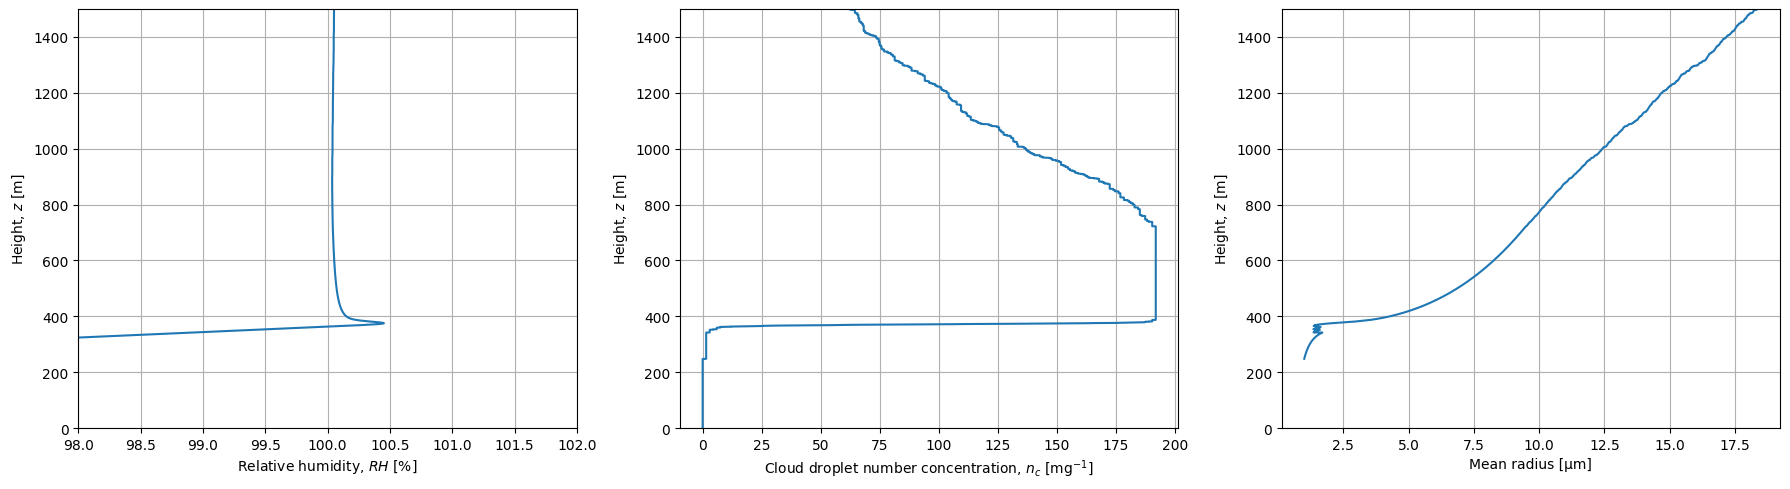

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))


# AX 1

axs[0].plot(reference_run['RH_parcel']*100, reference_run['z_parcel'])
axs[0].set_xlabel('Relative humidity, $RH$ [%]')
axs[0].set_xlim(98,102)

# AX 2

axs[1].plot(reference_run['nc'], reference_run['z_parcel'])
axs[1].set_xlabel('Cloud droplet number concentration, $n_c$ [mg$^{-1}$]')

# AX 3

axs[2].plot(reference_run['rc_liq_avg']*1e6, reference_run['z_parcel'])
axs[2].set_xlabel('Mean radius [µm]')

for ax in axs:
    ax.set_ylabel('Height, $z$ [m]')
    ax.set_ylim(reference_run['z_parcel'][0],reference_run['z_parcel'][-1])
    ax.grid()

plt.tight_layout()
plt.show()

### Exercise 1.3

The code box below plots a so-called spectrum of cloud droplet sizes. Execute it.

/var/folders/pm/yr9p5vts11g53s85rr_h4kw8tlv16r/T/ipykernel_17667/2458100818.py:3: UserWarning: Log scale: values of z <= 0 have been masked
  contour = ax.contourf(1e6*rm_spec, reference_run['z_parcel'], reference_run['spectra'], norm=matplotlib.colors.LogNorm())#, levels=np.logspace(2, 10, 20))


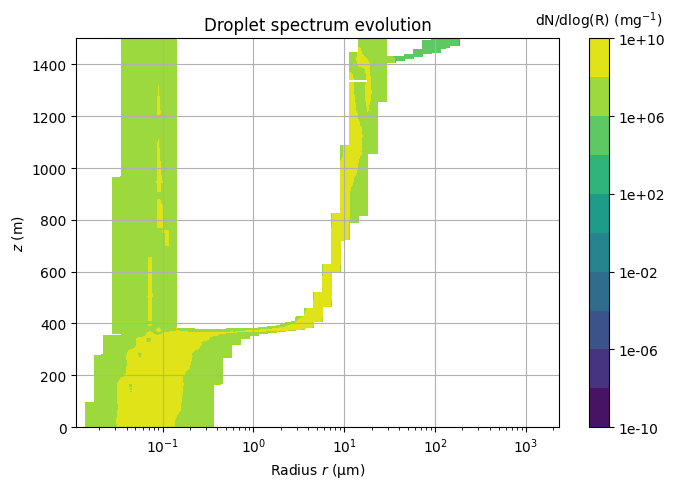

In [21]:
fig, ax = plt.subplots(figsize=(7,5))

contour = ax.contourf(1e6*rm_spec, reference_run['z_parcel'], reference_run['spectra'], norm=matplotlib.colors.LogNorm())#, levels=np.logspace(2, 10, 20))
cbar = plt.colorbar(contour, ax=ax, format="%.0e")

ax.set_title('Droplet spectrum evolution')
ax.set_xlabel('Radius $r$ (µm)')
ax.set_ylabel('$z$ (m)')
cbar.ax.set_title('dN/dlog(R) (mg$^{-1}$)', fontsize = 10, pad = 10)
ax.set_xscale('log')
ax.grid()

plt.tight_layout()
plt.show()

### Exercise 1.4

- Compare the plot of the droplet spectrum to the plot of mean radius. What do they have in common, how are they different? You may need to change to a log scale on the mean radius plot to compare.
    - ANS:
        1. The mean radius follows the branch of activated droplets. This represents the majority of particles, so the mean radius tracks this pathway almost exactly.
        2. In the spectrum there are also interstitial aerosol which are too small to activate, which follow the pathway on the "left".


- The plot of the droplet number mixing ratio features three different regimes. Explain, which microphysical processes cause these three regimes. Refer to the droplet spectrum to support your explanation.
    - ANS: NEED TO CHANGE TO HAVE RUN W/ COLLISION-COALESENCE BRANCH.
        1. Below cloud base (0 - 380 m): Aerosol and haze particles.
        2. Near cloud base (380 - 1000 m): Activated cloud droplets.
        3. Near cloud top (1000 m +): Collisional growth reduces the number of droplets and eventually leads to precipitation.

## Exercise 2: What controls the number of droplets in the parcel?

You are now equipped to investigate how the liquid nuber concentration is modified by different factors.

### Exercise 2.1: Influence of pollution

Anthropogenic emissions of fine particulate matter increase the concentration of aerosol particles.

- Study the effect of particulate pollution on the microphysical composition of a cloud by comparing the simulation from Exercise 1.2 to a new, more polluted, simulation, where you double the number concentration of aerosol particles.

- Explain your plots by creating a conceptual diagram that relates aerosol number concentration, relative humidity (or supersaturation), cloud droplet number and mean droplet radius. Which microphysical processes are important? How does your diagram relect the equations of the parcel model?

In [18]:
gridwidget[1,0].value = 2 * ref_N # N_aero (cm-3)

In [19]:
polluted_run \
    = create_results_dict(timesteps_function(
        n_particles_widget, P_widget, \
        RH_widget, T_widget, w_widget, nt_widget, \
        dt_widget, rm_spec, ascending_mode_widget, \
        mode_displaytype_widget, z_widget, max_z_widget, \
        Condensation_widget, Collision_widget, \
        mode_aero_init_widget, gridwidget, kohler_widget.value, \
        hygroscopicity_widget.value, switch_sedi_removal.value, \
        entrainment_rate_widget.value,entrainment_widget.value,qv_profiles, theta_profiles, entrainment_start_widget.value, entrainment_end_widget.value
    ))

value: Time (s)  z (m)    T (K)    qv (g/kg) RH (%)   QC (g/kg) QR (g/kg) NA (/mg) NC (/mg) NR (/mg)
after: 3000.0    1500.00  279.94   7.37      100.098   0.961     1.174     11.59     42.45     2.00    


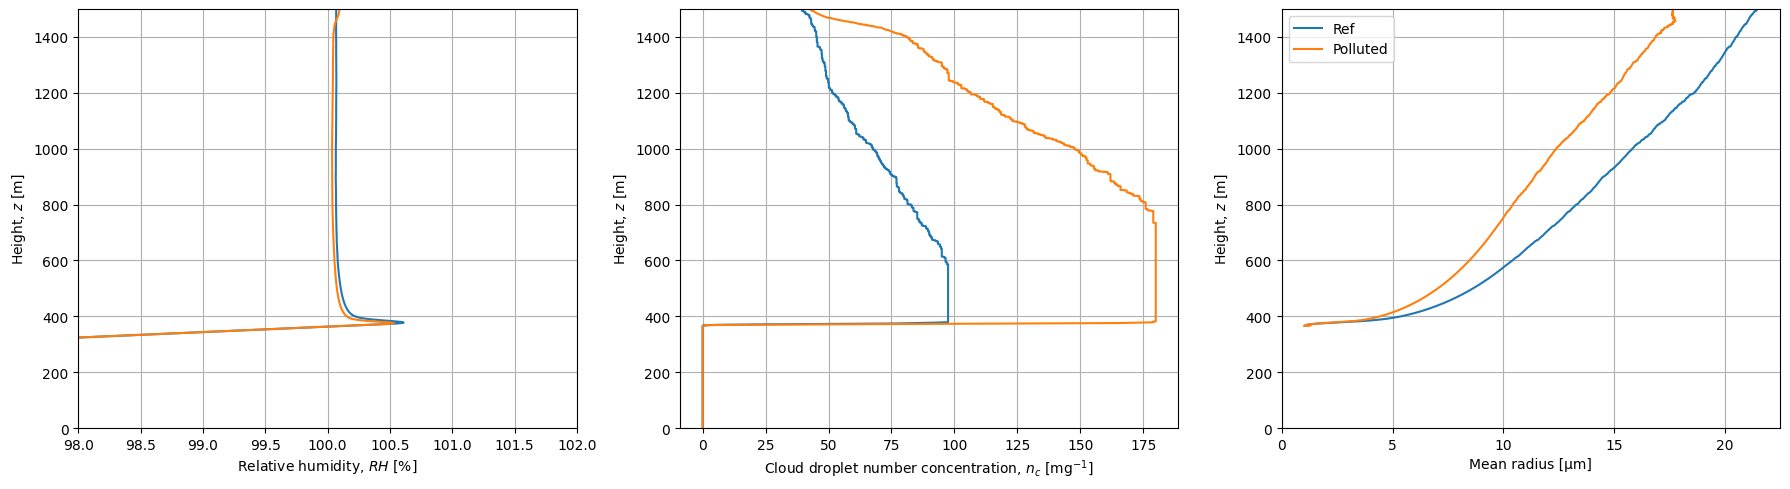

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))


# AX 1

axs[0].plot(reference_run['RH_parcel']*100, reference_run['z_parcel'])
axs[0].plot(polluted_run['RH_parcel']*100, polluted_run['z_parcel'])
axs[0].set_xlabel('Relative humidity, $RH$ [%]')
axs[0].set_xlim(98,102)

# AX 2

axs[1].plot(reference_run['nc'], reference_run['z_parcel'])
axs[1].plot(polluted_run['nc'], polluted_run['z_parcel'])
axs[1].set_xlabel('Cloud droplet number concentration, $n_c$ [mg$^{-1}$]')

# AX 3

axs[2].plot(reference_run['rc_liq_avg']*1e6, reference_run['z_parcel'], label="Ref")
axs[2].plot(polluted_run['rc_liq_avg']*1e6, polluted_run['z_parcel'], label="Polluted")
axs[2].set_xlabel('Mean radius [µm]')

for ax in axs:
    ax.set_ylabel('Height, $z$ [m]')
    ax.set_ylim(reference_run['z_parcel'][0],reference_run['z_parcel'][-1])
    ax.grid()

plt.legend()

plt.tight_layout()
plt.show()

ANS:

- Increasing the number of cloud condensation nuclei increases the number of activated droplets, as there are more CCN available for water to condense on.
- More droplets activating means more competition for water, so more water is taken up from the environment. This is not enough to fully compensate for the larger number of droplets, so their growth is also limited.

### Exercise 2.2: Role of updraft speed

The updraft speed controls how fast the parcel ascends.

- Study the effect of different updraft speeds on the microphysical composition of a cloud by comparing the simulation ‘reference_run’ to a simulation ‘fast_run’ with a faster parcel ascend, where you double the updraft speed (parameter 'w_widget').
- Explain your results by creating a conceptual diagram that relates updraft speed, supersaturation, cloud droplet number and mean droplet radius. Which microphysical processes are important? Hoe does your diagram reflect the equations of the parcel model?

In [21]:
# Reset N to origiinal concentration
gridwidget[1,0].value = ref_N

w_widget.value = 2 * ref_w

In [22]:
fast_run \
    = create_results_dict(timesteps_function(
        n_particles_widget, P_widget, \
        RH_widget, T_widget, w_widget, nt_widget, \
        dt_widget, rm_spec, ascending_mode_widget, \
        mode_displaytype_widget, z_widget, max_z_widget, \
        Condensation_widget, Collision_widget, \
        mode_aero_init_widget, gridwidget, kohler_widget.value, \
        hygroscopicity_widget.value, switch_sedi_removal.value, \
        entrainment_rate_widget.value,entrainment_widget.value,qv_profiles, theta_profiles, entrainment_start_widget.value, entrainment_end_widget.value
    ))

value: Time (s)  z (m)    T (K)    qv (g/kg) RH (%)   QC (g/kg) QR (g/kg) NA (/mg) NC (/mg) NR (/mg)
after: 2000.0    2000.00  277.24   6.49      100.201   1.169     1.843     0.80      29.84     4.35    


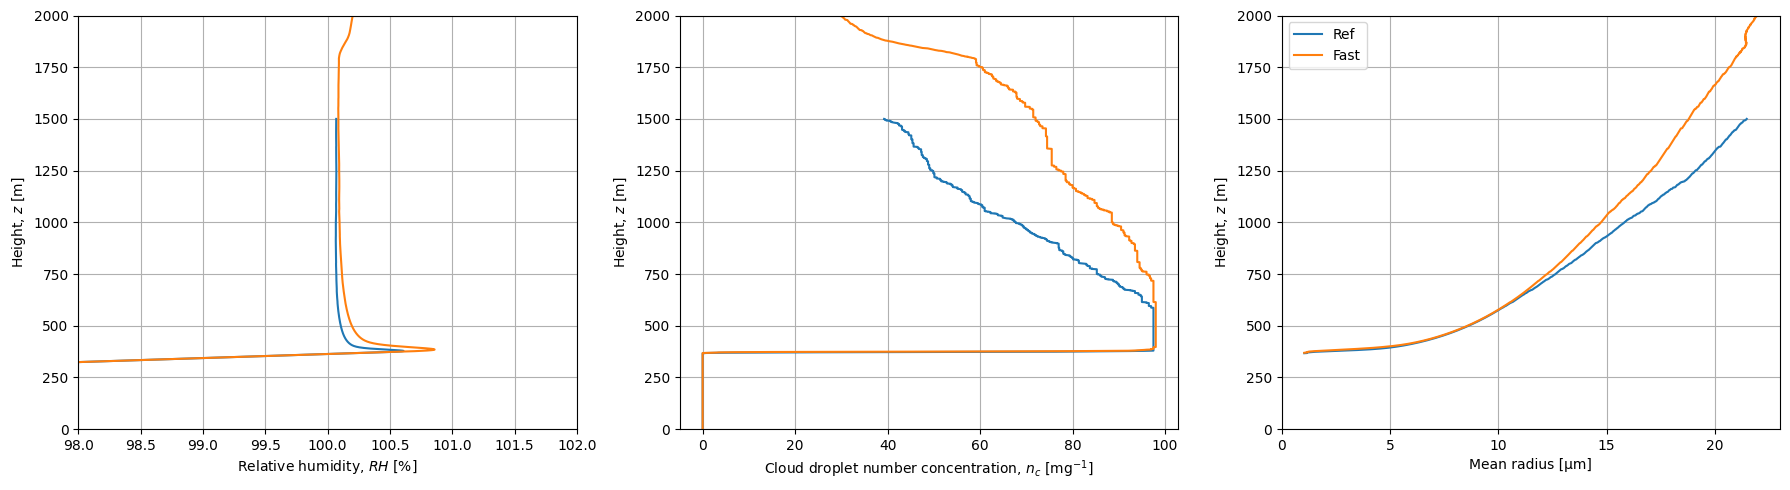

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))


# AX 1

axs[0].plot(reference_run['RH_parcel']*100, reference_run['z_parcel'])
axs[0].plot(fast_run['RH_parcel']*100, fast_run['z_parcel'])
axs[0].set_xlabel('Relative humidity, $RH$ [%]')
axs[0].set_xlim(98,102)

# AX 2

axs[1].plot(reference_run['nc'], reference_run['z_parcel'])
axs[1].plot(fast_run['nc'], fast_run['z_parcel'])
axs[1].set_xlabel('Cloud droplet number concentration, $n_c$ [mg$^{-1}$]')

# AX 3

axs[2].plot(reference_run['rc_liq_avg']*1e6, reference_run['z_parcel'], label="Ref")
axs[2].plot(fast_run['rc_liq_avg']*1e6, fast_run['z_parcel'], label="Fast")
axs[2].set_xlabel('Mean radius [µm]')

for ax in axs:
    ax.set_ylabel('Height, $z$ [m]')
    ax.set_ylim(fast_run['z_parcel'][0],fast_run['z_parcel'][-1])
    ax.grid()

plt.legend()

plt.tight_layout()
plt.show()

ANS:
- Below cloud base, where water vapour is not consumed, relative humidity increases in direct proportion to updraft speed as updraft speed determines the rate of adiabatic expansion and cooling of the air. See eqn. 7.30 in Lohmann.
- Through this cooling, faster updraft speeds lead to increased peak supersaturation at cloud base.
- This increased supersaturation leads to an increased number concentration of cloud droplets, as more droplets are activated.
- The mean radius of droplets decreases as a larger number of droplets compete for the available water vapour.

teh adiabatic cooling creates more supersaturation, its not that there is more water. its the temperature part of the RH equation.

try to think of a way to explain what is behind the effect of supersaturation

### Exercise 2.3: Importance of cloud thickness

The altitude of the cloud top corresponds to the thickness of the cloud for a given cloud base.

- Study the effect of cloud thickness on the microphysical composition of a cloud by comparing the simulation ‘reference_run’ to a simulation with a lower cloud top ‘thin_run’, where you set the cloud top height to 1/2 the reference.

- Explain your results by creating a conceptual diagram that relates cloud top, supersaturation, cloud droplet number and mean droplet radius. Which microphysical processes are important? How does your diagram reflect the equations of the parcel model?

In [24]:
# Reset w to original speed
w_widget.value = ref_w

max_z_widget.value = ref_z_max * 0.5

In [25]:
thin_run \
    = create_results_dict(timesteps_function(
        n_particles_widget, P_widget, \
        RH_widget, T_widget, w_widget, nt_widget, \
        dt_widget, rm_spec, ascending_mode_widget, \
        mode_displaytype_widget, z_widget, max_z_widget, \
        Condensation_widget, Collision_widget, \
        mode_aero_init_widget, gridwidget, kohler_widget.value, \
        hygroscopicity_widget.value, switch_sedi_removal.value, \
        entrainment_rate_widget.value,entrainment_widget.value,qv_profiles, theta_profiles, entrainment_start_widget.value, entrainment_end_widget.value
    ))

value: Time (s)  z (m)    T (K)    qv (g/kg) RH (%)   QC (g/kg) QR (g/kg) NA (/mg) NC (/mg) NR (/mg)
after: 2000.0    1000.00  282.54   8.28      100.067   1.191     0.026     5.75      66.50     0.37    


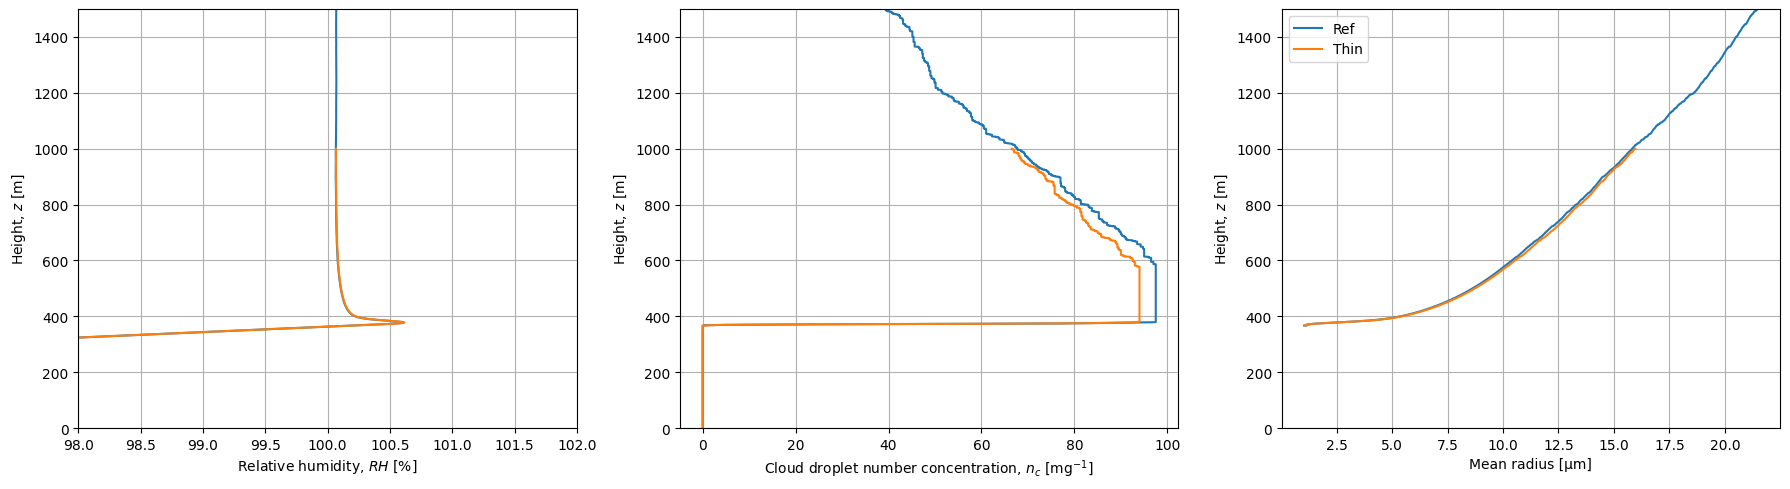

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))


# AX 1

axs[0].plot(reference_run['RH_parcel']*100, reference_run['z_parcel'])
axs[0].plot(thin_run['RH_parcel']*100, thin_run['z_parcel'])
axs[0].set_xlabel('Relative humidity, $RH$ [%]')
axs[0].set_xlim(98,102)

# AX 2

axs[1].plot(reference_run['nc'], reference_run['z_parcel'])
axs[1].plot(thin_run['nc'], thin_run['z_parcel'])
axs[1].set_xlabel('Cloud droplet number concentration, $n_c$ [mg$^{-1}$]')

# AX 3

axs[2].plot(reference_run['rc_liq_avg']*1e6, reference_run['z_parcel'], label="Ref")
axs[2].plot(thin_run['rc_liq_avg']*1e6, thin_run['z_parcel'], label="Thin")
axs[2].set_xlabel('Mean radius [µm]')

for ax in axs:
    ax.set_ylabel('Height, $z$ [m]')
    ax.set_ylim(reference_run['z_parcel'][0],reference_run['z_parcel'][-1])
    ax.grid()

plt.legend()

plt.tight_layout()
plt.show()

ANS:
- A thinner cloud leads to less consumption of spersaturation, as droplets in the parcel have less time to grow and consume water vapour before reaching the cloud top. SHOULD GET THE RUN WITH MORE C-C, THEN SEE THAT C-C LEADS TO MORE SUPERSAT LATER, DUE TO DECREASE OF SURFACE AVAILABLET O UPTAKE SUPERSAT
- The cloud droplet number concentration increases as the droplets do not grow large enough to begin collision-coalesence.
- The mean radius of the droplets is smaller for the same reason.

### Exercise 2.4: Aerosol vs. meteorology

Based on your experiments, comment on the following statement:

" The aerosol conditions are more important than meteorological factors like updraft and cloud thickness in controlling the droplet number concentration. "

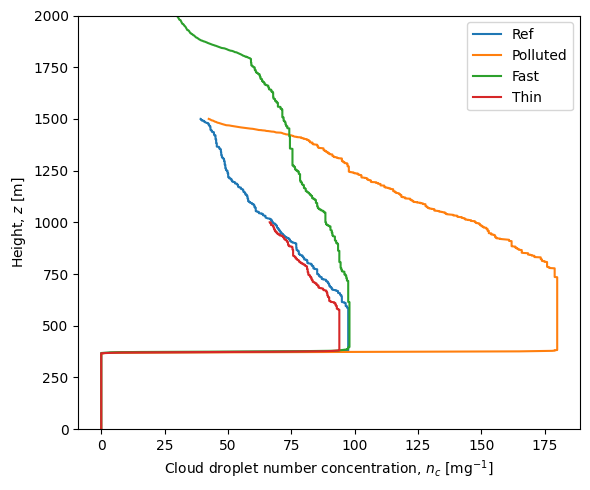

In [27]:
fig, ax = plt.subplots(figsize=(6,5))

ax.plot(reference_run['nc'], reference_run['z_parcel'], label="Ref")
ax.plot(polluted_run['nc'], polluted_run['z_parcel'], label="Polluted")
ax.plot(fast_run['nc'], fast_run['z_parcel'], label="Fast")
ax.plot(thin_run['nc'], thin_run['z_parcel'], label="Thin")
ax.set_xlabel('Cloud droplet number concentration, $n_c$ [mg$^{-1}$]')

ax.set_ylabel('Height, $z$ [m]')

ax.set_ylim(fast_run['z_parcel'][0],fast_run['z_parcel'][-1])

plt.legend()

plt.tight_layout()
plt.show()

ANS:
- Meteo factors more important

should use similar 2* factors to make it a more fair comparison

Solution: N A * 2 -> 1.5 * N
w * 2 -> 2 * N
D * 2 -> N / 4
=> meteo factors are relatively more important

## Exercise 3: Cloud albedo and precipitation

The microphysical composition of a cloud as described by the profiles/ timeseries of liquid number concentration and droplet radii determine the cloud albedo and the amount of rain formed in the cloud. The follow ing code box gives you an example of how to calculate albedo and rain for a given simulation.

- Describe how aerosol, updraft and cloud thickness influence albedo and rain.

- Can you explain your observations, when taking into account that:

    - The amount of rain corresponds to the total mass of all big droplets in a cloud.
    - Cloud albedo depends on the total durface of all the droplets in a cloud.

- Add albedo and rain to your conceptual diagrams from Exercise 2.

In [28]:
print(f"""
ALBEDO:

Reference run:\t{reference_run['albedo'][-1]:.3}
Polluted run:\t{polluted_run['albedo'][-1]:.3}
Fast run:\t{fast_run['albedo'][-1]:.3}
Thin run:\t{thin_run['albedo'][-1]:.3}

RWP (kg m-2):

Reference run:\t{rwp(reference_run, 0.5)[-1]*1e-3:.3}
Polluted run:\t{rwp(polluted_run, 0.5)[-1]*1e-3:.3}
Fast run:\t{rwp(fast_run, 1.0)[-1]*1e-3:.3}
Thin run:\t{rwp(thin_run, 0.5)[-1]*1e-3:.3}
""")


ALBEDO:

Reference run:	0.94
Polluted run:	0.951
Fast run:	nan
Thin run:	0.871

RWP (kg m-2):

Reference run:	0.152
Polluted run:	0.0876
Fast run:	0.396
Thin run:	0.00227



Solution:

- Albedo: N up, w up, D up -> albedo up
    - Explanation:
        - N up: increased surface for fixed total water
        - w up: N up, D up: more water
- Rain: N up, w up, D down -> rain down
    - Explanation:
        - N up: R down
        - W up: N up, D down: R down

Conceptual diagrams:

N up -> A up R up -> rain up